In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
data=[]
label =[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/fruit-recognition/train/train/'):
    for filename in filenames:
        data.append(os.path.join(dirname, filename))
        label.append(dirname.split('/')[-1])

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
len(data),data[0]

(16854, '/kaggle/input/fruit-recognition/train/train/Orange/Orange_398.jpg')

In [3]:
len(label),label[0]

(16854, 'Orange')

In [4]:
y = pd.get_dummies(label)
y.shape
y.head(1).T

,0
Apple Braeburn,0
Apple Granny Smith,0
Apricot,0
Avocado,0
Banana,0
Blueberry,0
Cactus fruit,0
Cantaloupe,0
Cherry,0
Clementine,0


In [5]:
import cv2

In [6]:
images=[]
for image in data:
    img = cv2.imread(image)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    images.append(img)

In [7]:
import tensorflow as tf
import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten

In [8]:
model = Sequential()


2023-01-03 10:39:51.782505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 10:39:51.874927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 10:39:51.875730: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 10:39:51.877517: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(33, activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
x_train = images
x_train = np.array(x_train).reshape(-1, 100, 100, 1)
x_train = x_train/255
y_train = y


In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

2023-01-03 10:39:56.902104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-01-03 10:39:58.180322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


264/264 [==============================] - 12s 20ms/step - loss: 0.4815 - accuracy: 0.8695
Epoch 2/10
264/264 [==============================] - 5s 20ms/step - loss: 0.0111 - accuracy: 0.9976
Epoch 3/10
264/264 [==============================] - 5s 20ms/step - loss: 6.9024e-04 - accuracy: 0.9999
Epoch 4/10
264/264 [==============================] - 5s 20ms/step - loss: 2.0426e-04 - accuracy: 1.0000
Epoch 5/10
264/264 [==============================] - 5s 20ms/step - loss: 1.3472e-04 - accuracy: 1.0000
Epoch 6/10
264/264 [==============================] - 5s 19ms/step - loss: 9.5926e-05 - accuracy: 1.0000
Epoch 7/10
264/264 [==============================] - 5s 20ms/step - loss: 7.1760e-05 - accuracy: 1.0000
Epoch 8/10
264/264 [==============================] - 5s 19ms/step - loss: 5.6050e-05 - accuracy: 1.0000
Epoch 9/10
264/264 [==============================] - 5s 19ms/step - loss: 4.4382e-05 - accuracy: 1.0000
Epoch 10/10
264/264 [==============================] - 5s 20ms/step - los

In [13]:
model.save('model.h5')

In [14]:
data=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/fruit-recognition/test/test/'):
    for filename in filenames:
        data.append(os.path.join(dirname, filename))

        

In [15]:
data.index('/kaggle/input/fruit-recognition/test/test/0072.jpg')

4287

In [16]:
timages=[]
for image in data:
    img = cv2.imread(image)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    timages.append(img)

In [17]:
x_test = timages
x_test = np.array(x_test).reshape(-1, 100, 100, 1)
x_test = x_test/255
x_test.shape

(5641, 100, 100, 1)

In [18]:
pred=model.predict(x_test)
timages[0]

array([[254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
y = pd.get_dummies(label)
y.shape
ans=y.head().T.index

In [20]:
ans[pred[data.index('/kaggle/input/fruit-recognition/test/test/0072.jpg')].argmax()]

'Pineapple'

In [21]:
submission = pd.read_csv('/kaggle/input/fruit-recognition/sampleSubmission.csv')

In [22]:
len(submission),len(x_test)

(5641, 5641)

In [23]:
for i in range(len(submission)):
    submission.label = ans[pred[i].argmax()]

In [24]:
submission.head()

,id,label
0,0,Cactus fruit
1,1,Cactus fruit
2,2,Cactus fruit
3,3,Cactus fruit
4,4,Cactus fruit


In [25]:
submission=submission.set_index('id')
submission.to_csv('submission.csv')


In [26]:
from matplotlib import pyplot as plt


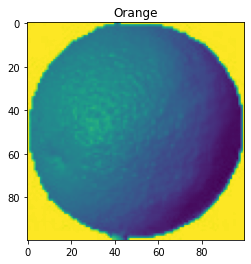

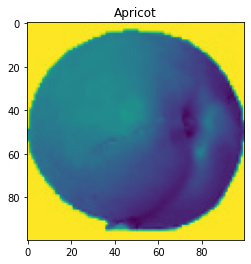

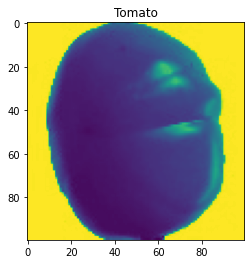

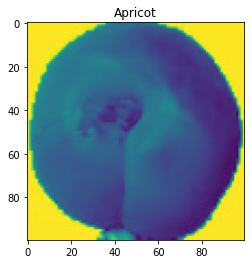

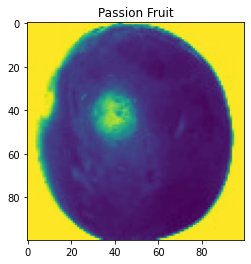

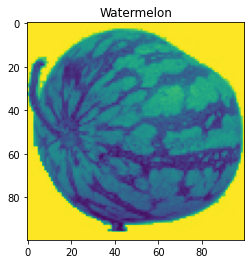

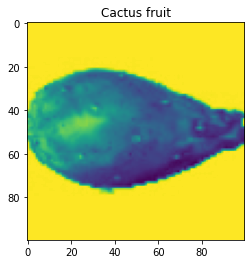

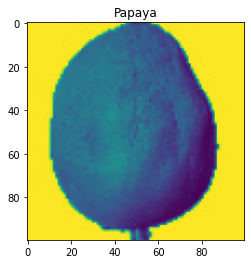

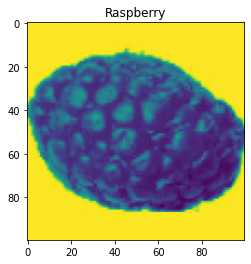

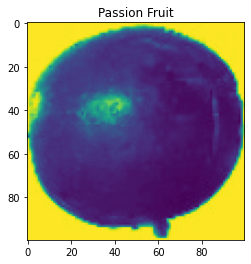

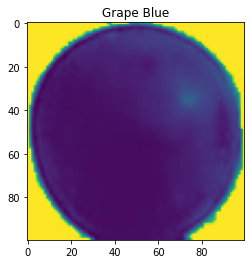

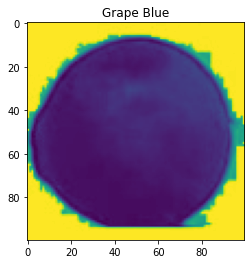

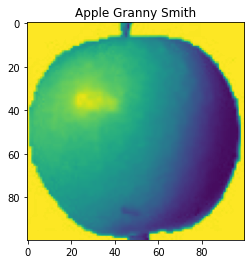

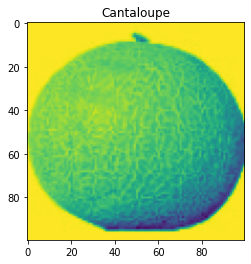

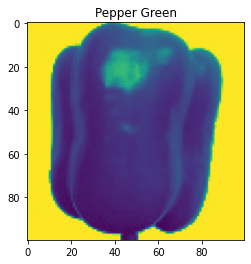

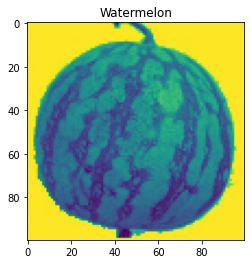

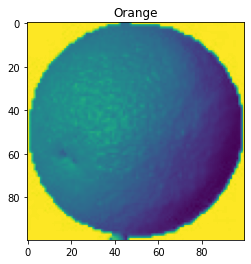

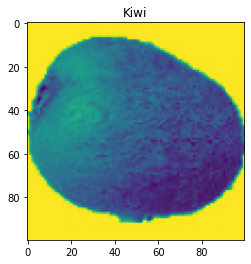

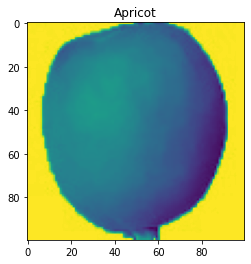

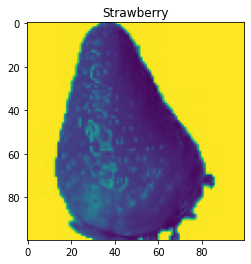

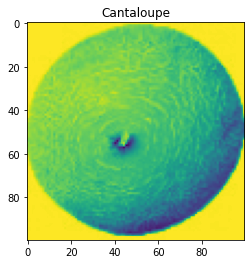

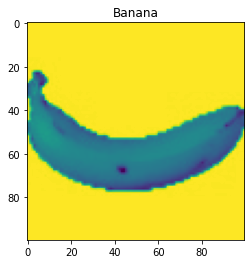

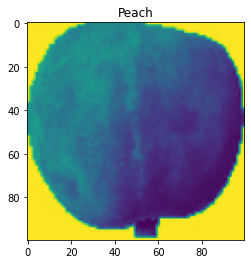

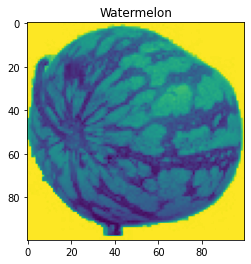

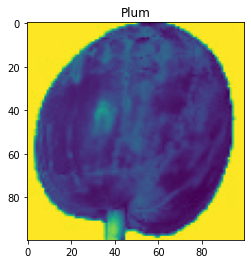

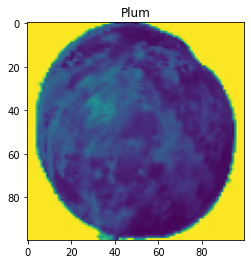

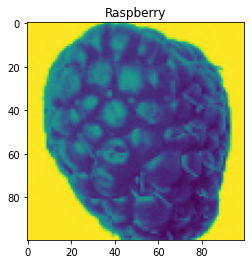

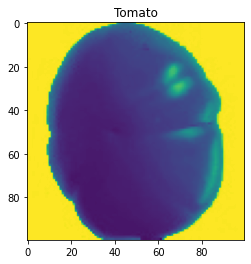

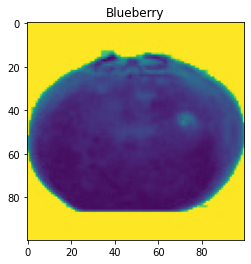

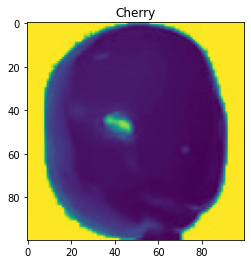

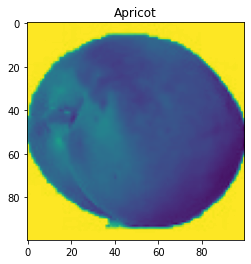

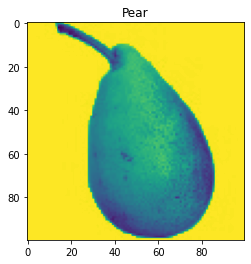

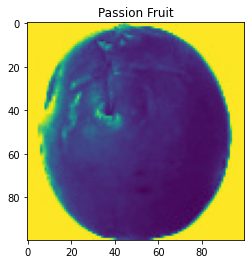

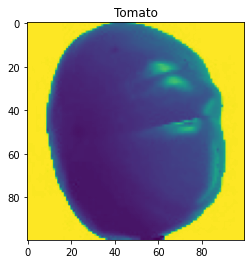

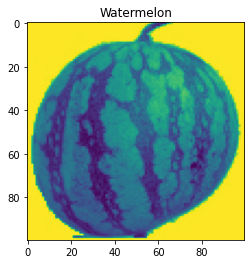

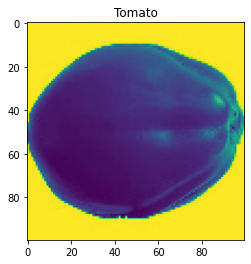

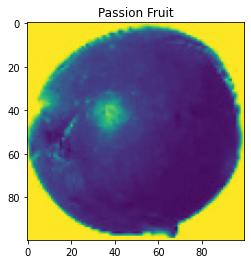

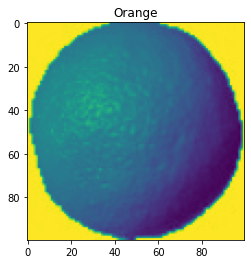

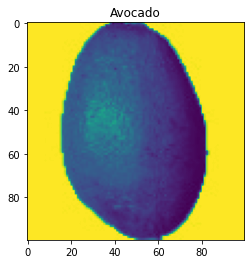

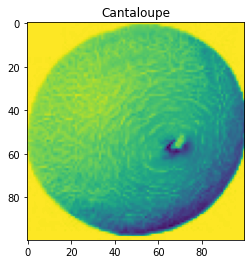

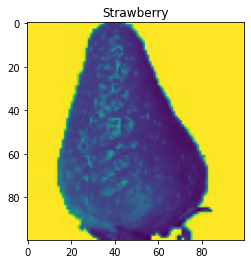

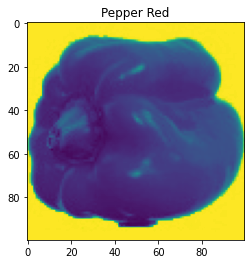

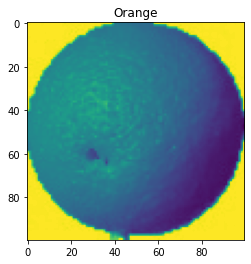

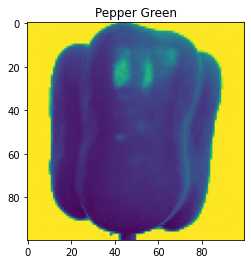

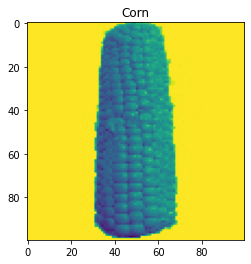

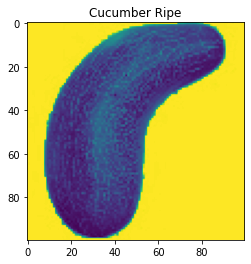

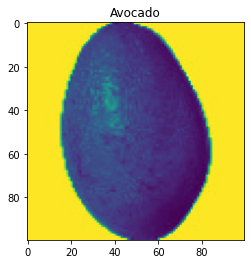

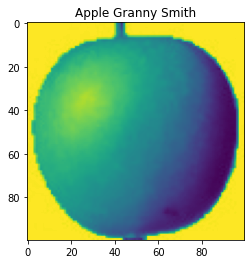

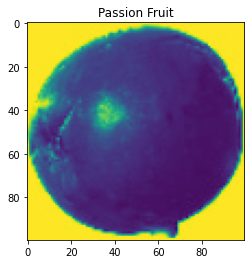

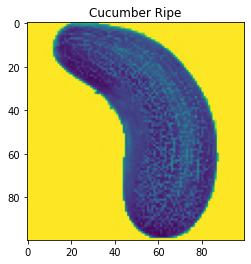

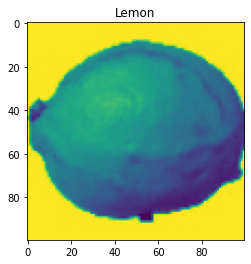

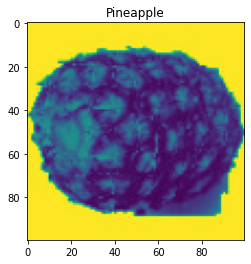

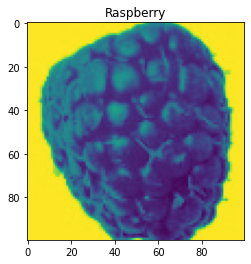

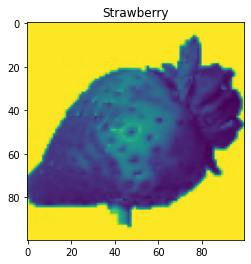

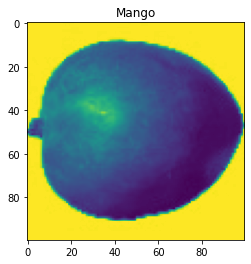

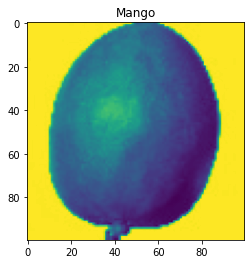

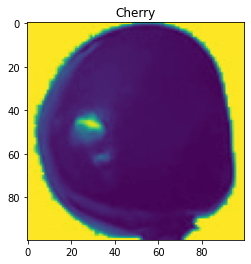

In [27]:
for i in range(0,len(timages),100):
    img = timages[i]
    _,ax = plt.subplots()
    ax.imshow(img)
    plt.title(ans[pred[i].argmax()])
    plt.show()
    